In [55]:
from copy import copy

import matplotlib.pyplot as plt
import numpy as np


In [39]:
X, y = np.loadtxt('ex1data1.txt', delimiter=',', unpack = True)

### Part 2: Plot Data

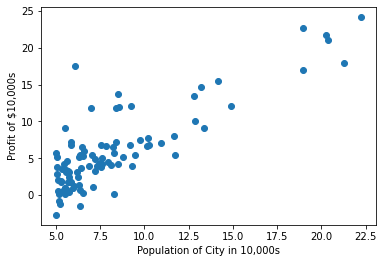

In [40]:
plt.scatter(X, Y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit of $10,000s')
plt.show()

### Part 3: Cost and Gradient Descent

In [41]:
def computeCost(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    return (1/(2*m)) * np.sum(np.square(np.dot(X, theta) - y))

In [42]:
# add column of 1's to X
X = np.column_stack([np.ones(len(X)), X])

In [44]:
theta = np.zeros(2)
# gradient descent settings
iterations = 1500
alpha = 0.01

J = computeCost(X, y, theta)

In [45]:
print(f'With theta= [0,0], Cost computed = {J}')
print('Expected cost value (approx) 32.07')

With theta= [0,0], Cost computed = 32.072733877455676
Expected cost value (approx) 32.07


In [46]:
J = computeCost(X, y, np.array([-1, 2]))

In [47]:
print(f'With theta= [-1,2], Cost computed = {J}')
print('Expected cost value (approx) 54.24')

With theta= [-1,2], Cost computed = 54.24245508201238
Expected cost value (approx) 54.24


In [65]:
def gradientDescent(X, y, theta, alpha, num_iter):
    m = len(y)
    theta = copy(theta)
    J_history = []
    for i in range(num_iter):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [69]:
theta = np.zeros(2)
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

print('Theta found:', theta)
print('Expected: [-3.6303, 1.664]')

Theta found: [-3.63029144  1.16636235]
Expected: [-3.6303, 1.664]


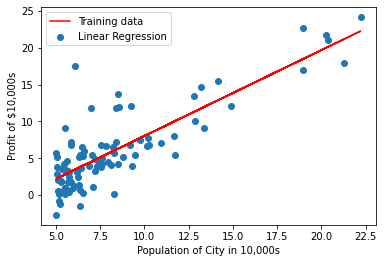

In [75]:
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], np.dot(X, theta), '-', color = 'red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit of $10,000s')
plt.legend(['Training data', 'Linear Regression'])
plt.show()

In [83]:
predict1 = np.dot([1,3.5], theta)*10000
predict2 = np.dot([1,7], theta)*10000

In [82]:
print('For a population of 35,000 we predict a profit of ', round(predict1))

For a population of 35,000 we predict a profit of  4520


In [84]:
print('For a population of 70,000 we predict a profit of ', round(predict2))

For a population of 70,000 we predict a profit of  45342


### Part 4: Visualizing J(theta_0, theta_1)

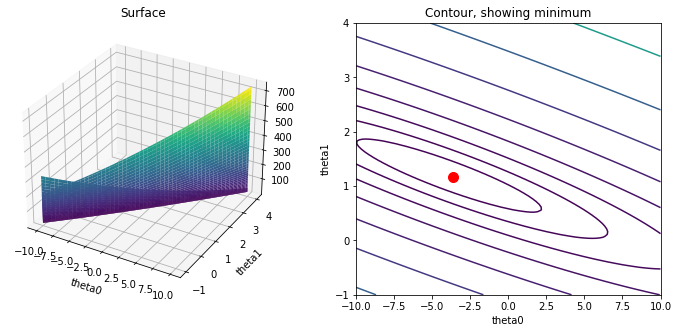

In [90]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

J_vals = J_vals.T

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
plt.show()